Below is the section 16.3 preprocessing and training notebook, which also fulfills the section 18.03 modeling requirements.

# 16.3 Capstone 2 Preprocessing And Training
<a id='16_3_Capstone_2_Preprocessing_And_Training'></a>

* [16.3.1 Recap Of Summaries Of Previous Notebooks](#16.3.1_Recap_Of_Summaries_Of_Previous_Notebooks)
* [16.3.2 Imports](#16.3.2_Imports)
* [16.3.3 Functions_Created](#16.3.3_Functions_Created)
* [16.3.4 Load The Study Data After Exploratory Data Analysis EDA](#16.3.4_Load_The_Study_Data_After_Exploratory_Data_Analysis_EDA)
* [16.3.5 Split The Data](#16.3.5_Split_The_Data)
* [16.3.6 Use Models to Find Best K](#16.3.6_Use_Models_to_Find_Best_K)
  * [16.3.6.1 KBest for Gradient Boosting Classifier](#16.3.6.1_KBest_for_Gradient_Boosting_Classifier)
  * [16.3.6.2 KBest for Linear SVC](#16.3.6.2_KBest_for_Linear_SVC)
  * [16.3.6.3 KBest for Logistic Regression](#16.3.6.3_KBest_for_Logistic_Regression) 
  * [16.3.6.4 Conclusion](#16.3.6.4_Conclusion)
* [16.3.7 Refining The Models](#16.3.7_Refining_The_Models)
  * [16.3.7.1 Gradient Boosting Classifier Model](#16.3.7.1_Gradient_Boosting_Classifier_Model)
    * [16.3.7.1.1 Assess performance on train and test data](#16.3.7.1.1_Assess_performance_on_train_and_test_data)
    * [16.3.7.1.2 Assessing performance using cross-validation](#16.3.7.1.2_Assessing_performance_using_cross-validation)
    * [16.3.7.1.3 Hyperparameter search using GridSearchCV](#16.3.7.1.3_Hyperparameter_search_using_GridSearchCV)
  * [16.3.7.2 Linear SVC Model](#16.3.7.2_Linear_SVC_Model)
    * [16.3.7.2.1 Assess performance on train and test data](#16.3.7.2.1_Assess_performance_on_train_and_test_data)
    * [16.3.7.2.2 Assessing performance using cross-validation](#16.3.7.2.2_Assessing_performance_using_cross-validation)
    * [16.3.7.2.3 Hyperparameter search using GridSearchCV](#16.3.7.2.3_Hyperparameter_search_using_GridSearchCV)
  * [16.3.7.3 Logistic Regression Model](#16.3.7.3_Logistic_Regression_Model)
    * [16.3.7.1.1 Assess performance on train and test data](#16.3.7.1.1_Assess_performance_on_train_and_test_data)
    * [16.3.7.1.2 Assessing performance using cross-validation](#16.3.7.1.2_Assessing_performance_using_cross-validation)
    * [16.3.7.1.3 Hyperparameter search using GridSearchCV](#16.3.7.1.3_Hyperparameter_search_using_GridSearchCV)  
* [16.3.8 Final Model Selection](#16.3.8_Final_Model_Selection)
  * [16.3.8.1 Gradient Boosting Classifier Performance](#16.3.8.1_Gradient_Boosting_Classifier_Performance)
  * [16.3.8.2 Linear SVC Performance](#16.3.8.2_Linear_SVC_Performance)
  * [16.3.8.3 Logistic Regression Performance](#16.3.8.3_Logistic_Regression_Performance)  
  * [16.3.8.4 Conclusion](#16.3.8.4_Conclusion)
* [16.3.9 Data Quantity Assessment](#16.3.9_Data_Quantity_Assessment)
* [16.3.10 Save Data](#16.3.10_Save_Data)
* [16.3.11 Summary](#16.3.11_Summary)

# 16.3.1 Recap Of Summaries Of Previous Notebooks <a id='16.3.1_Recap_Of_Summaries_Of_Previous_Notebooks'></a>

Goal: Predict likelihood of early stage diabetes based on various symptoms

The dataset includes the gender, age and 14 symptoms of a newly diabetic or would-be diabetic patient and whether they tested positive or negative for diabetes.  (Note - gender and age will be referred to as symptoms - making a total of 16 "symptoms" for testing.  There are 520 rows of data (data-wrangling notebook incorrectly said 550 at top, although showed 520 when working through data).  The aim is to build a model to predict whether a subject providing that data would be more likely to test positive or negative for diabetes.
(Note from the website source: The dataset was collected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor).

Definitions of some symptoms:
polyuria:  production of abnormally large volumes of dilute urine.
polydipsia:  abnormally great thirst as a symptom of disease (such as diabetes) or psychological disturbance.
polyphagia:  also known as hyperphagia, is the medical term for excessive or extreme hunger. It's different than having an increased appetite after exercise or other physical activity. While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food.
alopecia:  alopecia areata is a condition that causes hair to fall out in small patches, which can be unnoticeable. These patches may connect, however, and then become noticeable. The condition develops when the immune system attacks the hair follicles, resulting in hair loss.
partial paresis:  paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal. Paresis occurs when nerves are damaged.

The link to the UCI Machine Learning Repository dataset is:
https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.
(Note - the period is part of the link).

Related citations are:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
Islam, MM Faniqul, et al. 'Likelihood prediction of diabetes at early stage using data mining techniques.' Computer Vision and Machine Intelligence in Medical Image Analysis. Springer, Singapore, 2020. 113-125.

Data Wrangling revealed:
The given data had no missing values and was almost all boolean. Only age was not. Two different kinds of categorical age columns was made from the age column, as well as a binary version based on a range, based on two categories of the four category version that had a relatively high percentage of subjects in those age groups having diabetes_found.

The symptoms that seem to be most important separately and together are: 'polyuria', 'polydipsia', 'weakness', and 'partial_paresis'. That will be kept in mind although, since there are only 16 symptoms all together, they will probably all be looked at. Categorical-based algorithms will be explored because of the nature of the data.

Results:
320 of 520 subjects tested positive for diabetes
113 of 320 (35%) had all of the top four symptoms: 'polyuria', 'polydipsia', 'weakness', 'partial_paresis'
155 of 320 (48%) had all of the top three symptoms: 'polyuria', 'polydipsia', 'weakness'
193 of 320 (60%) had both of the top two symptoms: 'polyuria', 'polydipsia'

There are 16 symptoms being considered in this dataset. It should be noted that the dataset comes from one non-US hospital and are not a general population (see data source in "Recap Of Data Science Problem and Data Wrangling Summaries" above).

Furthermore, there are certain symptoms that are not well represented. For example, obesity and diabetes are shown to be very correlated by many studies (https://www.diabetesselfmanagement.com/about-diabetes/types-of-diabetes/type-2-diabetes-and-obesity-the-link/). However, in this full population sample, with or without diabetes, there are only 88 of 520 subjects that have obesity as a symptom.

Thus, it is hard to imagine that this dataset will produce a model that accurately predicts results for a US or worldwide population. However, the aim will be to make a good predictor for a population similar to the one given.

The best way to represent age as a boolean was explored in more detail in this notebook because age has a known correlation with diabetes (https://www.webmd.com/diabetes/diabetes-link-age). Again, this is a specific dataset population and, although the details of how this data source was obtained is unknown from the limited information on the website, it could be speculated that people of all ages that doctors suspected might have diabetes based on having at least one symptom were thus tested, as opposed to sampling made to represent the general population.

There was also a moderate negative correlation (-0.45) with 'is_male', which implies a moderate correlation with the gender being female. Thus, is_male should be included in this model. Note, however that this correlation also goes against reported greater prevalence of diabetes in males compared to females. (https://www.americashealthrankings.org/explore/annual/measure/Diabetes/state/ALL).

Similarly, about the gender correlation: In this dataset, there were 328 males and 147 of them had diabetes. On the other hand, there were 192 females and 173 of them had diabetes! This might mean that the correlation only relates to how men and women were each chosen to be in this dataset. Again, based on this and what was mentioned about other symptoms above, this dataset clearly does not match a general population, again showing that the model created will only be predictive for a population that meets some unknown criteria (potentially as narrow as "patients of Sylhet Diabetes Hospital in Sylhet, Bangladesh and approved by a doctor", but hopefully much more general, such as "third world patients"). However, it will still be interesting to discover how good a model could be made from this dataset, no matter how narrow its usefulness.

Although, as determined during data wrangling, there are some symptoms that have a much higher correlation with a diabetes diagnosis than others, since there are only 16 symptoms altogether and, although there are some moderate correlations, there are no strong correlations between any two of them. Thus, keeping all of them in an initial model would probably be a good starting place. That model could then be compared with other models where some symptoms that are less correlated with diabetes being found are excluded.

Just to remind from data wrangling, the top seven most prevalent symptoms that appear in those that had diabetes were (from most prevalent to least of top seven): 'polyuria', 'polydipsia', 'weakness', 'partial_paresis', 'polyphagia', 'sudden_weight_loss', 'age_over_47_point_5'. From the orrelation heatmap of full population above, the top seven of those with the greatest correlation with 'diabetes_found' were: 'polyuria' (0.67), 'polydipsia'(0.65), 'is_male' (-0.45), 'sudden_weight_loss'(0.44), 'partial_paresis'(0.43), 'polyphagia'(0.34), 'irritability'(0.30), 'visual blurring'(0.25).

# 16.3.2 Imports<a id='16.3.2_Imports'></a>

In [1]:
#standard
import pandas as pd
import numpy as np
import datetime
import os
#file
import pickle
from library.sb_utils import save_file
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn model support/metrics
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
#sklearn models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# 16.3.3 Functions Created<a id='16.3.3_Functions_Created'></a>

In [2]:
# No functions written for this notebook

# 16.3.4 Load The Study Data After Exploratory Data Analysis (EDA)<a id='16.3.4_Load_The_Study_Data_After_Exploratory_Data_Analysis_EDA'></a>

In [3]:
# The original CSV data file downloaded from UCI, diabetes_data_upload.csv is in the raw_data directory
# Re-load useful files from data wrangling put in data directory
datapath = '../data'
# Boolean version of 'Yes'/'No' valued columns using 1/0 instead of True/False to allow for summing (and minor other data cleanup)
df_boolean = pd.read_csv('../data/df_boolean.csv')
# Version of df_boolean with only those with diabetes_found = 0
df_boolean_diabetes_found = pd.read_csv('../data/df_boolean_diabetes_found.csv')
# Version of df_boolean with only those with diabetes_found = 1 and additional age fields added, including boolean
df_boolean_diabetes_not_found = pd.read_csv('../data/df_boolean_diabetes_not_found.csv')
# Total for each symptom for those with diabetes_found
df_diabetes_found_totals = pd.read_csv('../data/df_diabetes_found_totals.csv')
# Total for each symptom for those with diabetes_found, sorted descending based on total
# With additional fields symptom_importance and symptom_str
df_diabetes_found_totals_sorted = pd.read_csv('../data/df_diabetes_found_totals_sorted.csv')
# Binary version of symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found = pd.read_csv('../data/df_substr_binary_list_diabetes_found.csv')
# Binary version of first 7 symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found_7 = pd.read_csv('../data/df_substr_binary_list_diabetes_found_7.csv')
# Binary version of first 3 symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found_3 = pd.read_csv('../data/df_substr_binary_list_diabetes_found_3.csv')
# Binary version of first 2 symptoms sorted by importance for each subject with diabetes_found
df_substr_binary_list_diabetes_found_2 = pd.read_csv('../data/df_substr_binary_list_diabetes_found_2.csv')
# Version of df_boolean_diabetes_found with all non-boolean fields removed
df_boolean_only_diabetes_found = pd.read_csv('../data/df_boolean_only_diabetes_found.csv')

In [4]:
# Dataframe age experimentation columns, just in case, although probably won't be used
df_category = pd.read_csv('../data/df_category.csv')
# Dataframe with all 16 symptoms as boolean, keeping only age_over_47_point_5 as an age field
df_from_eda = pd.read_csv('../data/df_from_eda.csv')

In [5]:
# Get basic info about data
df_from_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   is_male              520 non-null    int64
 1   polyuria             520 non-null    int64
 2   polydipsia           520 non-null    int64
 3   sudden_weight_loss   520 non-null    int64
 4   weakness             520 non-null    int64
 5   polyphagia           520 non-null    int64
 6   genital_thrush       520 non-null    int64
 7   visual_blurring      520 non-null    int64
 8   itching              520 non-null    int64
 9   irritability         520 non-null    int64
 10  delayed_healing      520 non-null    int64
 11  partial_paresis      520 non-null    int64
 12  muscle_stiffness     520 non-null    int64
 13  alopecia             520 non-null    int64
 14  obesity              520 non-null    int64
 15  diabetes_found       520 non-null    int64
 16  age_over_47_point_5  520 n

In [6]:
# Examine some data
df_from_eda.head()

,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_over_47_point_5
0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0
1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1
2,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0
3,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,0
4,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [7]:
df_from_eda.describe()

,is_male,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,diabetes_found,age_over_47_point_5
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385,0.500000
std,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973,0.500481
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# 16.3.5 Split The Data<a id='16.3.5_Split_The_Data'></a>

NOTE:  The rubric is to see if every step identified in the DSM has been addressed or completed, including:

Creating dummy features

Scale standardization

Split data into training and testing subsets

Since the data for this project is now in all boolean form, creating dummy features and scale standardization are not relevant.
Therefore, the next step is splitting the data into training and testing subsets.


In [8]:
X_train, X_test, y_train, y_test = train_test_split(df_from_eda.drop(columns='diabetes_found'), 
                                                    df_from_eda.diabetes_found, test_size=0.3, 
                                                    random_state=47)

In [9]:
X_train.shape, X_test.shape

((364, 16), (156, 16))

In [10]:
y_train.shape, y_test.shape

((364,), (156,))

# 16.3.6 Use Models to Find Best K<a id='16.3.6_Use_Models_to_Find_Best_K'></a>

In [11]:
# Set up kbest filters to test
kbest_filter5 = SelectKBest(f_classif, k=5)
kbest_filter10 = SelectKBest(f_classif, k=10)
kbest_filter15 = SelectKBest(f_classif, k=15)
kbest_filter16 = SelectKBest(f_classif, k=16)

## 16.3.6.1 KBest for Gradient Boosting Classifier<a id='16.3.6.1_KBest_for_Gradient_Boosting_Classifier'></a>

In [12]:
#KBest for Gradient Boosting Classifier with initial hyperparameters is all 16 features
#Results of testing with 5, 10, 15, 16 features shown below, but final choice is 16
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0)
kbest_gbc_pipe = make_pipeline(kbest_filter16, gbc)
kbest_gbc_pipe.fit(X_train, y_train)
kbest_gbc_pipe.score(X_test, y_test)
#0.8910256410256411 kbest5
#0.8910256410256411 kbest10
#0.9038461538461539 kbest15
#0.9487179487179487 kbest16

0.9487179487179487

## 16.3.6.2 KBest for Linear SVC<a id='16.3.6.2_KBest_for_Linear_SVC'></a>

In [13]:
#KBest for Linear SVC with initial hyperparameters is all 16 features
#Results of testing with 5, 10, 15, 16 features shown below, but final choice is 16
lsvc = LinearSVC(random_state=0, tol=1e-05)
kbest_lsvc_pipe = make_pipeline(kbest_filter16, lsvc)
kbest_lsvc_pipe.fit(X_train, y_train)
kbest_lsvc_pipe.score(X_test, y_test)
#0.8910256410256411 kbest5
#0.8974358974358975 kbest10
#0.9230769230769231 kbest15
#0.9423076923076923 kbest16

0.9423076923076923

## 16.3.6.3 KBest for Logistic Regression<a id='16.3.6.3_KBest_for_Logistic_Regression'></a>

In [14]:
#KBest for Logistic Regression with initial hyperparameters is all 16 features
#Results of testing with 5, 10, 15, 16 features shown below, but final choice is 16
lr = LogisticRegression(random_state=0)
kbest_lr_pipe = make_pipeline(kbest_filter16, lr)
kbest_lr_pipe.fit(X_train, y_train)
kbest_lr_pipe.score(X_test, y_test)
#0.8910256410256411 kbest5
#0.9166666666666666 kbest10
#0.9294871794871795 kbest15
#0.9423076923076923 kbest16

0.9423076923076923

## 16.3.6.4 Conclusion<a id='16.3.6.4_Conclusion'></a>

Since a KBest of 16 had the best score for all three models, all 16 features will be used for now.  Later experimenting might be used to change this when used in combination with other hyperparameters.

# 16.3.7 Refining The Models<a id='16.3.7_Refining_The_Models'></a>

## 16.3.7.1 Gradient Boosting Classifier Model<a id='16.3.7.1_Gradient_Boosting_Classifier_Model'></a>

### 16.3.7.1.1 Assess performance on train and test data<a id='16.3.7.1.1_Assess_performance_on_train_and_test_data'></a>

In [15]:
y_tr_pred_gbc = kbest_gbc_pipe.predict(X_train)
y_te_pred_gbc = kbest_gbc_pipe.predict(X_test)

r2_score_train_gbc, r2_score_test_gbc = r2_score(y_train, y_tr_pred_gbc), r2_score(y_test, y_te_pred_gbc)

mae_train_gbc, mae_test_gbc = mean_absolute_error(y_train, y_tr_pred_gbc), mean_absolute_error(y_test, y_te_pred_gbc)

confusion_matrix_train_gbc = confusion_matrix(y_train, y_tr_pred_gbc)
confusion_matrix_test_gbc = confusion_matrix(y_test, y_te_pred_gbc)

In [16]:
r2_score_train_gbc, r2_score_test_gbc
#(0.7113310493592184, 0.780436312456017)

(0.7113310493592184, 0.780436312456017)

In [17]:
mae_train_gbc, mae_test_gbc
#(0.06868131868131869, 0.05128205128205128)

(0.06868131868131869, 0.05128205128205128)

In [18]:
confusion_matrix_train_gbc
#-- tn fp
#-- fn tp
#array([[129,  13],
#       [ 12, 210]], dtype=int64)

array([[129,  13],
       [ 12, 210]], dtype=int64)

In [19]:
confusion_matrix_test_gbc
#-- tn fp
#-- fn tp
#array([[53,  5],
#       [ 3, 95]], dtype=int64)
#used ravel method here one to test it out, but do not use it again in this notebook
tn, fp, fn, tp = confusion_matrix_test_gbc.ravel()
print(tn, fp, fn, tp)
#53 5 3 95

53 5 3 95


### 16.3.7.1.2 Assessing performance using cross-validation<a id='16.3.7.1.2_Assessing_performance_using_cross-validation'></a>

In [20]:
cv_results_gbc = cross_validate(kbest_gbc_pipe, X_train, y_train, cv=10)

In [21]:
cv_results_gbc
'''
{'fit_time': array([0.0348115 , 0.02599812, 0.03302121, 0.02799845, 0.02700067,
        0.03792405, 0.02901888, 0.02606106, 0.02508378, 0.04461718]),
 'score_time': array([0.00200009, 0.00100183, 0.0020628 , 0.00099826, 0.00200152,
        0.00199986, 0.00199771, 0.00099707, 0.00099468, 0.00195551]),
 'test_score': array([0.86486486, 0.81081081, 0.83783784, 0.97297297, 0.97222222,
        0.88888889, 0.91666667, 1.        , 0.94444444, 0.97222222])}
'''

"\n{'fit_time': array([0.0348115 , 0.02599812, 0.03302121, 0.02799845, 0.02700067,\n        0.03792405, 0.02901888, 0.02606106, 0.02508378, 0.04461718]),\n 'score_time': array([0.00200009, 0.00100183, 0.0020628 , 0.00099826, 0.00200152,\n        0.00199986, 0.00199771, 0.00099707, 0.00099468, 0.00195551]),\n 'test_score': array([0.86486486, 0.81081081, 0.83783784, 0.97297297, 0.97222222,\n        0.88888889, 0.91666667, 1.        , 0.94444444, 0.97222222])}\n"

In [22]:
cv_scores_gbc = cv_results_gbc['test_score']
cv_scores_gbc
#array([0.86486486, 0.81081081, 0.83783784, 0.97297297, 0.97222222,
#       0.88888889, 0.91666667, 1.        , 0.94444444, 0.97222222])

array([0.86486486, 0.81081081, 0.83783784, 0.97297297, 0.97222222,
       0.88888889, 0.91666667, 1.        , 0.94444444, 0.97222222])

In [23]:
np.mean(cv_scores_gbc), np.std(cv_scores_gbc)
#(0.9180930930930931, 0.06157387447362209)

(0.9180930930930931, 0.06157387447362209)

### 16.3.7.1.3 Hyperparameter search using GridSearchCV<a id='16.3.7.1.3_Hyperparameter_search_using_GridSearchCV'></a>

In [24]:
kbest_gbc_pipe.get_params().keys()
'''
dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'gradientboostingclassifier', 
'selectkbest__k', 'selectkbest__score_func', 'gradientboostingclassifier__ccp_alpha', 
'gradientboostingclassifier__criterion', 'gradientboostingclassifier__init', 
'gradientboostingclassifier__learning_rate', 'gradientboostingclassifier__loss', 
'gradientboostingclassifier__max_depth', 'gradientboostingclassifier__max_features', 
'gradientboostingclassifier__max_leaf_nodes', 'gradientboostingclassifier__min_impurity_decrease', 
'gradientboostingclassifier__min_impurity_split', 'gradientboostingclassifier__min_samples_leaf', 
'gradientboostingclassifier__min_samples_split', 'gradientboostingclassifier__min_weight_fraction_leaf', 
'gradientboostingclassifier__n_estimators', 'gradientboostingclassifier__n_iter_no_change', 
'gradientboostingclassifier__presort', 'gradientboostingclassifier__random_state', 'gradientboostingclassifier__subsample', 
'gradientboostingclassifier__tol', 'gradientboostingclassifier__validation_fraction', 
'gradientboostingclassifier__verbose', 'gradientboostingclassifier__warm_start'])
'''

"\ndict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'gradientboostingclassifier', \n'selectkbest__k', 'selectkbest__score_func', 'gradientboostingclassifier__ccp_alpha', \n'gradientboostingclassifier__criterion', 'gradientboostingclassifier__init', \n'gradientboostingclassifier__learning_rate', 'gradientboostingclassifier__loss', \n'gradientboostingclassifier__max_depth', 'gradientboostingclassifier__max_features', \n'gradientboostingclassifier__max_leaf_nodes', 'gradientboostingclassifier__min_impurity_decrease', \n'gradientboostingclassifier__min_impurity_split', 'gradientboostingclassifier__min_samples_leaf', \n'gradientboostingclassifier__min_samples_split', 'gradientboostingclassifier__min_weight_fraction_leaf', \n'gradientboostingclassifier__n_estimators', 'gradientboostingclassifier__n_iter_no_change', \n'gradientboostingclassifier__presort', 'gradientboostingclassifier__random_state', 'gradientboostingclassifier__subsample', \n'gradientboostingclassifier__tol', 'gradient

In [25]:
n_est_gbc = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
learning_rate_gbc = [0.1, 0.25, 0.5, 0.75, 1.0]
max_depth_gbc = [1, 2, 3, 4]
gbc_grid_params = {
        'gradientboostingclassifier__n_estimators': n_est_gbc,
        'gradientboostingclassifier__learning_rate': learning_rate_gbc,
        'gradientboostingclassifier__max_depth': max_depth_gbc
}
gbc_grid_params
'''
{'gradientboostingclassifier__n_estimators': [10,
  12,
  16,
  20,
  26,
  33,
  42,
  54,
  69,
  88,
  112,
  143,
  183,
  233,
  297,
  379,
  483,
  615,
  784,
  1000],
 'gradientboostingclassifier__learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
 'gradientboostingclassifier__max_depth': [1, 2, 3, 4]}

'''

"\n{'gradientboostingclassifier__n_estimators': [10,\n  12,\n  16,\n  20,\n  26,\n  33,\n  42,\n  54,\n  69,\n  88,\n  112,\n  143,\n  183,\n  233,\n  297,\n  379,\n  483,\n  615,\n  784,\n  1000],\n 'gradientboostingclassifier__learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],\n 'gradientboostingclassifier__max_depth': [1, 2, 3, 4]}\n\n"

In [26]:
#10-fold cross-validation, all available CPU cores 
gbc_grid_cv = GridSearchCV(kbest_gbc_pipe, param_grid=gbc_grid_params, cv=10, n_jobs=-1)

In [27]:
gbc_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=16)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier(learning_rate=1.0,
                                                                   max_depth=1,
                                                                   random_state=0))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.1,
                                                                       0.25,
                                                                       0.5,
                                                                       0.75,
                                                                       1.0],
                         'gradientboostingclassifier__max_depth': [1, 2, 3, 4],
                         'gradientboostingclassifier__n_estimators': [10, 12,
                 

In [28]:
#Best params (`best_params_` attribute) from the grid search
gbc_grid_cv.best_params_
#{'gradientboostingclassifier__learning_rate': 0.25,
# 'gradientboostingclassifier__max_depth': 3,
# 'gradientboostingclassifier__n_estimators': 88}

{'gradientboostingclassifier__learning_rate': 0.25,
 'gradientboostingclassifier__max_depth': 3,
 'gradientboostingclassifier__n_estimators': 88}

In [29]:
gbc_best_cv_results = cross_validate(gbc_grid_cv.best_estimator_, X_train, y_train, cv=10)
gbc_best_scores = gbc_best_cv_results['test_score']
gbc_best_scores
#array([0.94594595, 0.91891892, 0.89189189, 1.        , 1.        ,
#       1.        , 0.94444444, 1.        , 1.        , 0.97222222])

array([0.94594595, 0.91891892, 0.89189189, 1.        , 1.        ,
       1.        , 0.94444444, 1.        , 1.        , 0.97222222])

In [30]:
np.mean(gbc_best_scores), np.std(gbc_best_scores)
#(0.9673423423423422, 0.03791588606663465)

(0.9673423423423422, 0.03791588606663465)

In [31]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
gbc_neg_mae = cross_validate(gbc_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

In [32]:
gbc_mae_mean = np.mean(-1 * gbc_neg_mae['test_score'])
gbc_mae_std = np.std(-1 * gbc_neg_mae['test_score'])
gbc_mae_mean, gbc_mae_std
#(0.03265765765765766, 0.03791588606663466)

(0.03265765765765766, 0.03791588606663466)

In [33]:
mean_absolute_error(y_test, gbc_grid_cv.best_estimator_.predict(X_test))
#0.03205128205128205

0.03205128205128205

## 16.3.7.2 Linear SVC Model<a id='16.3.7.2_Linear_SVC_Model'></a>

### 16.3.7.2.1 Assess performance on train and test data<a id='16.3.7.2.1_Assess_performance_on_train_and_test_data'></a>

In [34]:
y_tr_pred_lsvc = kbest_lsvc_pipe.predict(X_train)
y_te_pred_lsvc = kbest_lsvc_pipe.predict(X_test)

r2_score_train_lsvc, r2_score_test_lsvc = r2_score(y_train, y_tr_pred_lsvc), r2_score(y_test, y_te_pred_lsvc)

mae_train_lsvc, mae_test_lsvc = mean_absolute_error(y_train, y_tr_pred_lsvc), mean_absolute_error(y_test, y_te_pred_lsvc)

confusion_matrix_train_lsvc = confusion_matrix(y_train, y_tr_pred_lsvc)
confusion_matrix_test_lsvc = confusion_matrix(y_test, y_te_pred_lsvc)

In [35]:
r2_score_train_lsvc, r2_score_test_lsvc
#(0.6882375333079559, 0.752990851513019)

(0.6882375333079559, 0.752990851513019)

In [36]:
mae_train_lsvc, mae_test_lsvc
#(0.07417582417582418, 0.057692307692307696)

(0.07417582417582418, 0.057692307692307696)

In [37]:
confusion_matrix_train_lsvc
#-- tn fp
#-- fn tp
#array([[127,  15],
#       [ 12, 210]], dtype=int64)

array([[127,  15],
       [ 12, 210]], dtype=int64)

In [38]:
confusion_matrix_test_lsvc
#-- tn fp
#-- fn tp
#array([[52,  6],
#       [ 3, 95]], dtype=int64)

array([[52,  6],
       [ 3, 95]], dtype=int64)

### 16.3.7.2.2 Assessing performance using cross-validation<a id='16.3.7.2.2_Assessing_performance_using_cross-validation'></a>

In [39]:
cv_results_lsvc = cross_validate(kbest_lsvc_pipe, X_train, y_train, cv=10)

In [40]:
cv_results_lsvc
'''
{'fit_time': array([0.00986552, 0.00763369, 0.00889516, 0.00816965, 0.01010942,
        0.01074672, 0.00820708, 0.00800085, 0.00741076, 0.00599647]),
 'score_time': array([0.00157022, 0.00306129, 0.00257707, 0.00300193, 0.00613594,
        0.00353813, 0.00276423, 0.00192881, 0.00200558, 0.00200033]),
 'test_score': array([0.86486486, 0.81081081, 0.83783784, 0.94594595, 0.97222222,
        0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])}
'''

"\n{'fit_time': array([0.00986552, 0.00763369, 0.00889516, 0.00816965, 0.01010942,\n        0.01074672, 0.00820708, 0.00800085, 0.00741076, 0.00599647]),\n 'score_time': array([0.00157022, 0.00306129, 0.00257707, 0.00300193, 0.00613594,\n        0.00353813, 0.00276423, 0.00192881, 0.00200558, 0.00200033]),\n 'test_score': array([0.86486486, 0.81081081, 0.83783784, 0.94594595, 0.97222222,\n        0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])}\n"

In [41]:
cv_scores_lsvc = cv_results_lsvc['test_score']
cv_scores_lsvc
#array([0.86486486, 0.81081081, 0.83783784, 0.94594595, 0.97222222,
#       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

array([0.86486486, 0.81081081, 0.83783784, 0.94594595, 0.97222222,
       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

In [42]:
np.mean(cv_scores_lsvc), np.std(cv_scores_lsvc)
#(0.9098348348348348, 0.056628159206191284)

(0.9098348348348348, 0.056628159206191284)

### 16.3.7.2.3 Hyperparameter search using GridSearchCV<a id='16.3.7.2.3_Hyperparameter_search_using_GridSearchCV'></a>

In [43]:
kbest_lsvc_pipe.get_params().keys()
'''
dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearsvc', 'selectkbest__k',
'selectkbest__score_func', 'linearsvc__C', 'linearsvc__class_weight', 'linearsvc__dual',
'linearsvc__fit_intercept', 'linearsvc__intercept_scaling', 'linearsvc__loss', 'linearsvc__max_iter', 
'linearsvc__multi_class', 'linearsvc__penalty', 'linearsvc__random_state', 'linearsvc__tol', 'linearsvc__verbose'])
'''

"\ndict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'linearsvc', 'selectkbest__k',\n'selectkbest__score_func', 'linearsvc__C', 'linearsvc__class_weight', 'linearsvc__dual',\n'linearsvc__fit_intercept', 'linearsvc__intercept_scaling', 'linearsvc__loss', 'linearsvc__max_iter', \n'linearsvc__multi_class', 'linearsvc__penalty', 'linearsvc__random_state', 'linearsvc__tol', 'linearsvc__verbose'])\n"

In [44]:
lsvc_pipe = make_pipeline(lsvc)
lsvc_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'linearsvc', 'linearsvc__C', 'linearsvc__class_weight', 'linearsvc__dual', 'linearsvc__fit_intercept', 'linearsvc__intercept_scaling', 'linearsvc__loss', 'linearsvc__max_iter', 'linearsvc__multi_class', 'linearsvc__penalty', 'linearsvc__random_state', 'linearsvc__tol', 'linearsvc__verbose'])

In [45]:
tol_lsvc = [1e-07, 1e-06, 1e-05, 1e-04, 1e-03]
lsvc_grid_params = {
        'linearsvc__tol': tol_lsvc
}
lsvc_grid_params
'''
{'linearsvc__tol': [1e-07, 1e-06, 1e-05, 0.0001, 0.001]}
'''

"\n{'linearsvc__tol': [1e-07, 1e-06, 1e-05, 0.0001, 0.001]}\n"

In [46]:
#10-fold cross-validation, all available CPU cores 
lsvc_grid_cv = GridSearchCV(kbest_lsvc_pipe, param_grid=lsvc_grid_params, cv=10, n_jobs=-1)

In [47]:
lsvc_grid_cv.fit(X_train, y_train)
'''
GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=16)),
                                       ('linearsvc',
                                        LinearSVC(random_state=0, tol=1e-05))]),
             n_jobs=-1,
             param_grid={'linearsvc__tol': [1e-07, 1e-06, 1e-05, 0.0001,
                                            0.001]})
'''

"\nGridSearchCV(cv=10,\n             estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=16)),\n                                       ('linearsvc',\n                                        LinearSVC(random_state=0, tol=1e-05))]),\n             n_jobs=-1,\n             param_grid={'linearsvc__tol': [1e-07, 1e-06, 1e-05, 0.0001,\n                                            0.001]})\n"

In [48]:
#Best params (`best_params_` attribute) from the grid search
lsvc_grid_cv.best_params_

{'linearsvc__tol': 1e-07}

In [49]:
lsvc_best_cv_results = cross_validate(lsvc_grid_cv.best_estimator_, X_train, y_train, cv=10)
lsvc_best_scores = lsvc_best_cv_results['test_score']
lsvc_best_scores
#array([0.86486486, 0.81081081, 0.83783784, 0.94594595, 0.97222222,
#       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

array([0.86486486, 0.81081081, 0.83783784, 0.94594595, 0.97222222,
       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

In [50]:
np.mean(lsvc_best_scores), np.std(lsvc_best_scores)
#(0.9098348348348348, 0.056628159206191284)

(0.9098348348348348, 0.056628159206191284)

In [51]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lsvc_neg_mae = cross_validate(lsvc_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

In [52]:
lsvc_mae_mean = np.mean(-1 * lsvc_neg_mae['test_score'])
lsvc_mae_std = np.std(-1 * lsvc_neg_mae['test_score'])
lsvc_mae_mean, lsvc_mae_std
#(0.09016516516516518, 0.0566281592061913)

(0.09016516516516518, 0.0566281592061913)

In [53]:
mean_absolute_error(y_test, lsvc_grid_cv.best_estimator_.predict(X_test))
#0.057692307692307696

0.057692307692307696

## 16.3.7.3 Logistic Regression Model<a id='16.3.7.3_Logistic_Regression_Model'></a>

### 16.3.7.3.1 Assess performance on train and test data<a id='16.3.7.3.1_Assess_performance_on_train_and_test_data'></a>

In [54]:
y_tr_pred_lr = kbest_lr_pipe.predict(X_train)
y_te_pred_lr = kbest_lr_pipe.predict(X_test)

r2_score_train_lr, r2_score_test_lr = r2_score(y_train, y_tr_pred_lr), r2_score(y_test, y_te_pred_lr)

mae_train_lr, mae_test_lr = mean_absolute_error(y_train, y_tr_pred_lr), mean_absolute_error(y_test, y_te_pred_lr)

confusion_matrix_train_lr = confusion_matrix(y_train, y_tr_pred_lr)
confusion_matrix_test_lr = confusion_matrix(y_test, y_te_pred_lr)

In [55]:
r2_score_train_lr, r2_score_test_lr
#(0.7113310493592184, 0.752990851513019)

(0.7113310493592184, 0.752990851513019)

In [56]:
mae_train_lr, mae_test_lr
#(0.06868131868131869, 0.057692307692307696)

(0.06868131868131869, 0.057692307692307696)

In [57]:
confusion_matrix_train_lr
#-- tn fp
#-- fn tp
#array([[130,  12],
#       [ 13, 209]], dtype=int64)

array([[130,  12],
       [ 13, 209]], dtype=int64)

In [58]:
confusion_matrix_test_lr
#-- tn fp
#-- fn tp
#array([[53,  5],
#       [ 4, 94]], dtype=int64)

array([[53,  5],
       [ 4, 94]], dtype=int64)

### 16.3.7.3.2 Assessing performance using cross-validation<a id='16.3.7.3.2_Assessing_performance_using_cross-validation'></a>

In [59]:
cv_results_lr = cross_validate(kbest_lr_pipe, X_train, y_train, cv=10)

In [60]:
cv_results_lr
'''
{'fit_time': array([0.0188055 , 0.01344538, 0.01358414, 0.01317668, 0.01239085,
        0.01544642, 0.0133152 , 0.01203704, 0.01411843, 0.01345062]),
 'score_time': array([0.00284028, 0.00421214, 0.00289226, 0.00288892, 0.00239873,
        0.00444412, 0.00222564, 0.00248575, 0.00349951, 0.00324774]),
 'test_score': array([0.89189189, 0.75675676, 0.81081081, 0.97297297, 1.        ,
        0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])}
'''

"\n{'fit_time': array([0.0188055 , 0.01344538, 0.01358414, 0.01317668, 0.01239085,\n        0.01544642, 0.0133152 , 0.01203704, 0.01411843, 0.01345062]),\n 'score_time': array([0.00284028, 0.00421214, 0.00289226, 0.00288892, 0.00239873,\n        0.00444412, 0.00222564, 0.00248575, 0.00349951, 0.00324774]),\n 'test_score': array([0.89189189, 0.75675676, 0.81081081, 0.97297297, 1.        ,\n        0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])}\n"

In [61]:
cv_scores_lr = cv_results_lr['test_score']
cv_scores_lr
#array([0.89189189, 0.75675676, 0.81081081, 0.97297297, 1.        ,
#       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

array([0.89189189, 0.75675676, 0.81081081, 0.97297297, 1.        ,
       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

In [62]:
np.mean(cv_scores_lr), np.std(cv_scores_lr)
#(0.9099099099099099, 0.07452274300379981)

(0.9099099099099099, 0.07452274300379981)

### 16.3.7.3.3 Hyperparameter search using GridSearchCV<a id='16.3.7.3.3_Hyperparameter_search_using_GridSearchCV'></a>

In [63]:
kbest_lr_pipe.get_params().keys()
'''
dict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'logisticregression',
'selectkbest__k', 'selectkbest__score_func', 'logisticregression__C', 'logisticregression__class_weight', 
'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 
'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 
'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', 
'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])
'''

"\ndict_keys(['memory', 'steps', 'verbose', 'selectkbest', 'logisticregression',\n'selectkbest__k', 'selectkbest__score_func', 'logisticregression__C', 'logisticregression__class_weight', \n'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', \n'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', \n'logisticregression__n_jobs', 'logisticregression__penalty', 'logisticregression__random_state', \n'logisticregression__solver', 'logisticregression__tol', 'logisticregression__verbose', 'logisticregression__warm_start'])\n"

In [64]:
solver_lr = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

In [65]:
lr_grid_params = {
        'logisticregression__solver': solver_lr
}
lr_grid_params
'''
{'logisticregression__solver': ['newton-cg',
  'lbfgs',
  'liblinear',
  'sag',
  'saga']}
'''

"\n{'logisticregression__solver': ['newton-cg',\n  'lbfgs',\n  'liblinear',\n  'sag',\n  'saga']}\n"

In [66]:
#10-fold cross-validation, all available CPU cores 
lr_grid_cv = GridSearchCV(kbest_lr_pipe, param_grid=lr_grid_params, cv=10, n_jobs=-1)

In [67]:
lr_grid_cv.fit(X_train, y_train)
'''
GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=16)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=0))]),
             n_jobs=-1,
             param_grid={'logisticregression__solver': ['newton-cg', 'lbfgs',
                                                        'liblinear', 'sag',
                                                        'saga']})
'''

"\nGridSearchCV(cv=10,\n             estimator=Pipeline(steps=[('selectkbest', SelectKBest(k=16)),\n                                       ('logisticregression',\n                                        LogisticRegression(random_state=0))]),\n             n_jobs=-1,\n             param_grid={'logisticregression__solver': ['newton-cg', 'lbfgs',\n                                                        'liblinear', 'sag',\n                                                        'saga']})\n"

In [68]:
lr_grid_cv.best_params_
#{'logisticregression__solver': 'newton-cg'}

{'logisticregression__solver': 'newton-cg'}

In [69]:
lr_best_cv_results = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, cv=10)
lr_best_scores = lr_best_cv_results['test_score']
lr_best_scores
#array([0.89189189, 0.75675676, 0.81081081, 0.97297297, 1.        ,
#       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

array([0.89189189, 0.75675676, 0.81081081, 0.97297297, 1.        ,
       0.88888889, 0.91666667, 1.        , 0.91666667, 0.94444444])

In [70]:
np.mean(lr_best_scores), np.std(lr_best_scores)
#(0.9099099099099099, 0.07452274300379981)

(0.9099099099099099, 0.07452274300379981)

In [71]:
# 'neg_mean_absolute_error' uses the (negative of) the mean absolute error
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=10, n_jobs=-1)

In [72]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std
#(0.09009009009009009, 0.07452274300379984)

(0.09009009009009009, 0.07452274300379984)

In [73]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))
0.057692307692307696

0.057692307692307696

# 16.3.8 Final Model Selection<a id='16.3.8_Final_Model_Selection'></a>

## 16.3.8.1 Gradient Boosting Classifier Performance<a id='16.3.8.1_Gradient_Boosting_Classifier_Performance'></a>

Summary of results with some given hyperparameters:
- r2 train score: 0.71
- mae train score: 0.07
- confusion matrix train (tp fp fn tn): 129, 13, 12, 210
- r2 test score: 0.78
- mae test score: 0.05
- confusion matrix test (tp fp fn tn): 53, 5, 3, 95
- mean of cross-validated scores: 0.92
- standard deviation of cross-validated scores: 0.06

Summary of results with some best GridSearchCV hyperparameters:
- mean of cross-validated scores using default scoring for estimator train score: 0.97
- standard deviation of cross-validated scores using default scoring for estimator train score: 0.04
- mean of cross-validated scores using mae for estimator train score: 0.03
- standard deviation of cross-validated scores using mae for estimator train score: 0.04
- mae test score: 0.03

## 16.3.8.2 Linear SVC Performance<a id='16.3.8.2_Linear_SVC_Performance'></a>

Summary of results with some given hyperparameters:
- r2 train score: 0.69
- mae train score: 0.07
- confusion matrix train (tp fp fn tn): 127, 15, 12, 210
- r2 test score: 0.75
- mae test score: 0.06
- confusion matrix test (tp fp fn tn): 52, 6, 3, 95
- mean of cross-validated scores: 0.91
- standard deviation of cross-validated scores: 0.06

Summary of results with some best GridSearchCV hyperparameters:
- mean of cross-validated scores using default scoring for estimator train score: 0.91
- standard deviation of cross-validated scores using default scoring for estimator train score: 0.06
- mean of cross-validated scores using mae for estimator train score: 0.09
- standard deviation of cross-validated scores using mae for estimator train score: 0.06
- mae test score: 0.06

## 16.3.8.3 Logistic Regression Performance<a id='16.3.8.3_Logistic_Regression_Performance'></a>

Summary of results with some given hyperparameters:
- r2 train score: 0.71
- mae train score: 0.07
- confusion matrix train (tp fp fn tn): 130, 12, 13, 209
- r2 test score: 0.75
- mae test score: 0.06
- confusion matrix test (tp fp fn tn): 53, 5, 4, 94
- mean of cross-validated scores: 0.91
- standard deviation of cross-validated scores: 0.07

Summary of results with some best GridSearchCV hyperparameters:
- mean of cross-validated scores using default scoring for estimator train score: 0.91
- standard deviation of cross-validated scores using default scoring for estimator train score: 0.07
- mean of cross-validated scores using mae for estimator train score: 0.09
- standard deviation of cross-validated scores using mae for estimator train score: 0.07
- mae test score: 0.06

## 16.3.8.4 Conclusion<a id='16.3.8.4_Conclusion'></a>

The performance of the gradient boosting classifier (gbc), linear svc (lsvc), and logistic regression (lr) models were compared.

Of these, the gbc model appears to be the winner.  This conclusion is consistent throughout all three stages of the comparisons.

In the first comparison ("Assess performance on train and test data" to get values for train and test r2 score, mae, and confusion matrices), the following was found:
The gbc model had slightly better r2 and mae scores than the other two models.  Also, both the train and test confusion matrices was arguably slightly better than the other two.  This is because the gbc and lsvc models were tied for having the least false negatives.  Because this is about predicting diabetes, it is arguably better to have more false positives than false negatives when the greater concern is catching the disease in someone who has it than subjecting a potential false negative candidate to an unnecessary test.  Thus, in the area of confusion matrices, gbc and lsvc could be considered tied for the lead when looking at false negatives.  However, gbc pulls ahead of lsvc because it has less false positives than lsvc.

In the second comparison ("Assessing performance using cross-validation" to get values for the mean and standard deviation of the ten folds of a cross-validation), the following was found:
The gbc model was slightly ahead of the other models with a mean of 0.92 and a standard deviation of 0.06.  The other two both had a mean of 0.91 and a standard deviation of 0.06 for lsvc and 0.07 for lr.

In the third comparison ("Hyperparameter search using GridSearchCV" to use the GridSearchCV method to do test out a given set of hyperparameters to do a ten-fold cross-validation and find out combination of parameters work:
On this test, the gbc model with its best parameters was a clear winner with a mean of 0.97 and a standard deviation of 0.04 across the ten-fold cross-validation.  The other two model mean and standard deviation was similar to their ten-fold cross-validation results with the initial hyperparameter settings - a mean of 0.91 and a standard deviation of 0.06 or 0.07.  The mae results of cross-validation of best hyperparameters for the gbc model were a mean of 0.03 and 0.04 for training data and a mean of 0.03 for the test data.  This was significantly better than the results of either of the other two models.

Thus, based on the testing done in this notebook, the gbc model appears to be the clear winner.

# 16.3.9 Data Quantity Assessment<a id='16.3.9_Data_Quantity_Assessment'></a>

In [74]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(kbest_gbc_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

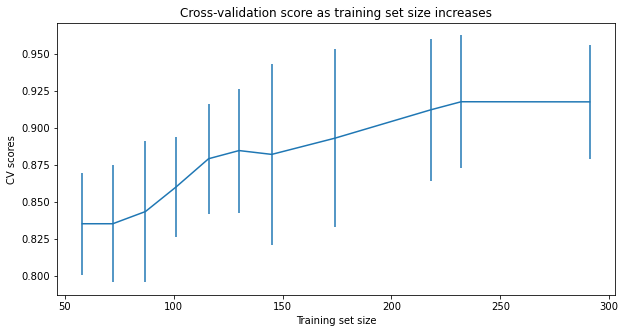

In [75]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

The benefits of the training set size seems to level off at about 235 or so but the leveling off is not part of a clearcut pattern that indicates that no larger training set could provide a significant gain.  Thus, further exploration might be desired to see if getting more training data is desirable, if it were a situation where that was possible. 

# 16.3.10 Save Data<a id='16.3.10_Save_Data'></a>

In [76]:
# Save various dataframes created in this notebook as csv files in /data subdirectory
datapath = '../data'
# Save various models created in this notebook as csv files in /models subdirectory
modelpath = '../models'

In [77]:
#This may not be "production grade ML deployment" practice, but adding some basic
#information to your saved models can save your bacon in development.
#Just what version model have you just loaded to reuse? What version of `sklearn`
#created it? When did you make it?
#Assign the pandas version number (`pd.__version__`) to the `pandas_version` attribute,
#the numpy version (`np.__version__`) to the `numpy_version` attribute,
#the sklearn version (`sklearn_version`) to the `sklearn_version` attribute,
#and the current datetime (`datetime.datetime.now()`) to the `build_datetime` attribute
#Let's call this model version '1.0'
best_model = gbc_grid_cv.best_estimator_
best_model.version = '1.0'
best_model.pandas_version = pd.__version__
best_model.numpy_version = np.__version__
best_model.sklearn_version = sklearn_version
best_model.X_columns = [col for col in X_train.columns]
best_model.build_datetime = datetime.datetime.now()

save_file(best_model, 'capstone_2_diabetes_model.pkl', modelpath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../models\capstone_2_diabetes_model.pkl"


# 16.3.11 Summary<a id='16.3.11_Summary'></a>

Since the data for this project is now in all boolean form, creating dummy features and scale standardization are not relevant.
Therefore, tests were done using three models to try to pick the best model with the best choice of at least some hyperparameters for that model.  

The three models looked at were gradient boosting classifier (gbc), linear svc (lsvc), and logistic regression (lr) based on their known success with boolean data.  The gbc model won out based on various tests (see the "16.3.8 Final Model Selection" section to find out details about the test results and the "Conclusion" subsection to find out why gbc was chosen).

Then, in the "16.3.9 Data Quantity Assessment" section, a test was made to determine if better results were likely if there was more data than in the current dataset.  The test, as it was, was not conclusive, but it is possible the amount data is actually sufficient and that further improvement from more data would be marginal at best.

Finally, a pickle file was created to save best model and version information.